<a href="https://colab.research.google.com/github/Sinchiguano/chicagoUniversity/blob/main/linearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import files
import io
url = 'https://raw.githubusercontent.com/Sinchiguano/chicagoUniversity/main/prostate.csv'
df = pd.read_csv(url, sep='\t')
print(df.head(10))

   Unnamed: 0    lcavol   lweight  age      lbph  svi       lcp  gleason  \
0           1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6   
1           2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6   
2           3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7   
3           4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6   
4           5  0.751416  3.432373   62 -1.386294    0 -1.386294        6   
5           6 -1.049822  3.228826   50 -1.386294    0 -1.386294        6   
6           7  0.737164  3.473518   64  0.615186    0 -1.386294        6   
7           8  0.693147  3.539509   58  1.536867    0 -1.386294        6   
8           9 -0.776529  3.539509   47 -1.386294    0 -1.386294        6   
9          10  0.223144  3.244544   63 -1.386294    0 -1.386294        6   

   pgg45      lpsa train  
0      0 -0.430783     T  
1      0 -0.162519     T  
2     20 -0.162519     T  
3      0 -0.162519     T  
4      0  0.371564     T  
5

In [5]:
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [6]:
df_train=df[df['train']=='T']
df_test=df[df['train']=='F']

In [7]:
df_train.shape


(67, 10)

In [8]:
df_test.shape

(30, 10)

Next, we look at the pairwise correlations for each pair of variables, as in Table 3.1. We also show an example of showing this as a visual representation using matplotlib.


In [9]:
df_train.corr()

<ipython-input-9-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161,0.733155
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166,0.485215
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806,0.227642
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404,0.262938
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358,0.556886
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533,0.489203
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056,0.342428
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000,0.448048
lpsa,0.733155,0.485215,0.227642,0.262938,0.556886,0.489203,0.342428,0.448048,1.000000


<ipython-input-10-fb586d4211f6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_train.corr())


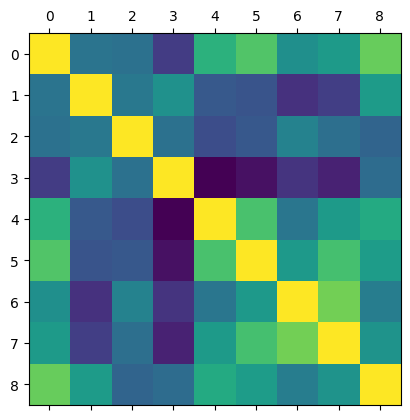

In [10]:
import matplotlib.pyplot as plt

#%matplotlib inline

plt.matshow(df_train.corr())

In [11]:

df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [12]:
df.describe().loc[['mean','std']]

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329


Linear Regression: Training, Evaluation, Feature Importance

We'll now perform linear regression on the dataset using Python's scikit-learn library. We import the library and create an instance of a Linear Regression class.


In [13]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
regr = linear_model.LinearRegression()

We must normalize our features to have mean 0 and standard deviation of 1, up to computational errors.

In [31]:
scaler = StandardScaler()
def normalize(df):
    iterator = pd.DataFrame(df.iloc[:,:-1]).items() #Will not change the response, only the predictors.
    for column,_ in iterator:
        column_data = pd.DataFrame(df[column]) # Create dataframe with a single column.
        new_column_array = scaler.fit_transform(column_data) # The scaler transforms the column.
        df[column] = pd.DataFrame(new_column_array) # Update column.
    return df


for i in df.items():
  print(i)

('lcavol', 0    -0.579818
1    -0.994252
2    -0.510826
3    -1.203973
4     0.751416
        ...   
92    2.830268
93    3.821004
94    2.907447
95    2.882564
96    3.471966
Name: lcavol, Length: 97, dtype: float64)
('lweight', 0     2.769459
1     3.319626
2     2.691243
3     3.282789
4     3.432373
        ...   
92    3.876396
93    3.896909
94    3.396185
95    3.773910
96    3.974998
Name: lweight, Length: 97, dtype: float64)
('age', 0     50
1     58
2     74
3     58
4     62
      ..
92    68
93    44
94    52
95    68
96    68
Name: age, Length: 97, dtype: int64)
('lbph', 0    -1.386294
1    -1.386294
2    -1.386294
3    -1.386294
4    -1.386294
        ...   
92   -1.386294
93   -1.386294
94   -1.386294
95    1.558145
96    0.438255
Name: lbph, Length: 97, dtype: float64)
('svi', 0     0
1     0
2     0
3     0
4     0
     ..
92    1
93    1
94    1
95    1
96    1
Name: svi, Length: 97, dtype: int64)
('lcp', 0    -1.386294
1    -1.386294
2    -1.386294
3    -1.386294
4  